In [2]:
#Time it takes per correct collision = exponential distrib; # of incorr collisiosn per time = poisson distrib?
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns
import pandas as pd
import scipy.stats as sci
from matplotlib.patches import Rectangle
%matplotlib inline 
import scipy.stats as sci
import matplotlib.ticker as ticker
import matplotlib.style



from analysis_utils import *
%load_ext autoreload
%autoreload

# 1a. Instantaneous transport & Indistinguishable tRNA

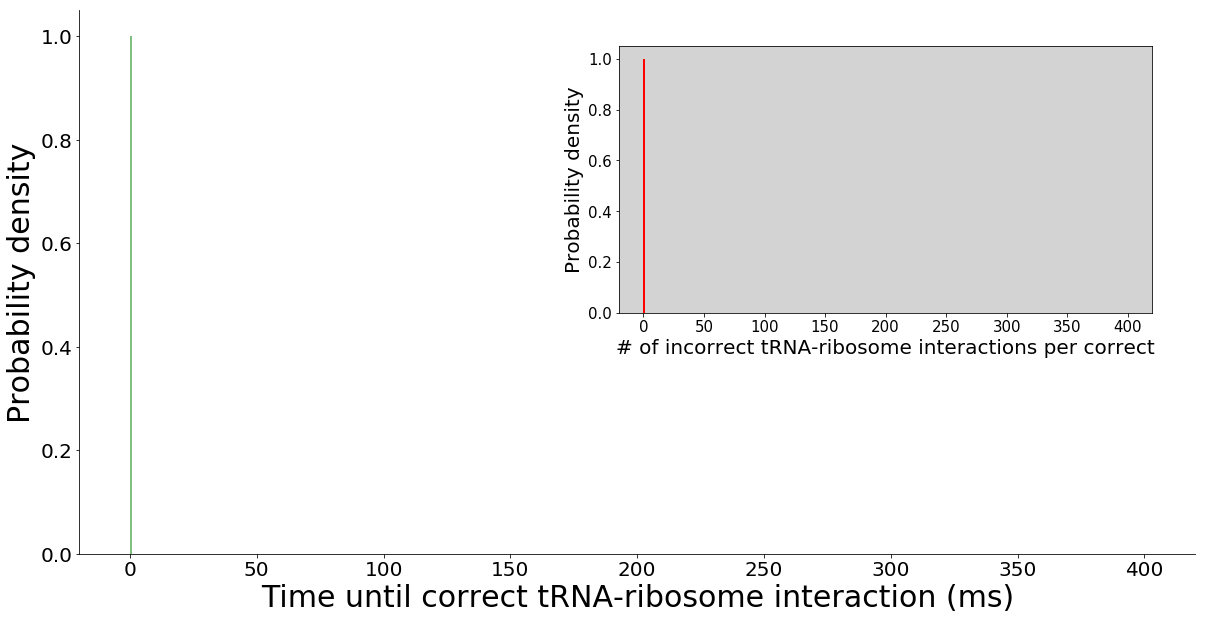

In [99]:
fig, ax = plt.subplots(figsize=(20,10)) 
incorrectRolls_arr = [0]

ax.tick_params(axis='both', which='major', labelsize=20)
ax.hist(incorrectRolls_arr,bins=400,range=(0,400),density=1,color='green',alpha=0.5);
#ax.set_title("Distribution of incorrect tRNA collisions per correct tRNA collision\n for a given ribosome & single cognate tRNA", y=1.18,fontsize=20)
ax.set_xlabel("Time until correct tRNA-ribosome interaction (ms)",fontsize=30)
ax.set_ylabel("Probability density",fontsize=30)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

##
sub_ax = plt.axes([.5, .46, .37, .37], facecolor='lightgrey')
sub_ax.tick_params(axis='both', which='major', labelsize=15)
sub_ax.hist(incorrectRolls_arr,bins=400,range=(0,400),density=1,color='red',alpha=1);
sub_ax.set_xlabel("# of incorrect tRNA-ribosome interactions per correct",fontsize=20)
sub_ax.set_ylabel("Probability density",fontsize=20)
plt.savefig("Fig1a.pdf")


# 1b. Instantaneous transport & Distinguishable tRNA


In [4]:
# Given 42 independent isoacceptor tRNAs, each with equal probability of being chosen (i.e., uniform distribution),
# if there is 1 "correct" tRNA and 41 "incorrect tRNAs", this algorithm runs many sampling events to 
# generate a distribution of # of incorrect tRNAs chosen per correct tRNA chosen.
incorrectRolls_disting_arr = list()
sampling_events = 200000
time_taken_arr = list()
np.random.seed(0)
for i in range(sampling_events):
    incorrectRolls_i = 0;
    time_taken_i=0;
    roll = np.random.randint(0,42)
    while(roll!=9): #9 is a arbitrarily picked "correct" tRNA
        incorrectRolls_i+=1
        roll = np.random.randint(0,42)
        time_taken_i+=np.random.exponential(1000/717)

    incorrectRolls_disting_arr.append(incorrectRolls_i)
    time_taken_arr.append(time_taken_i)

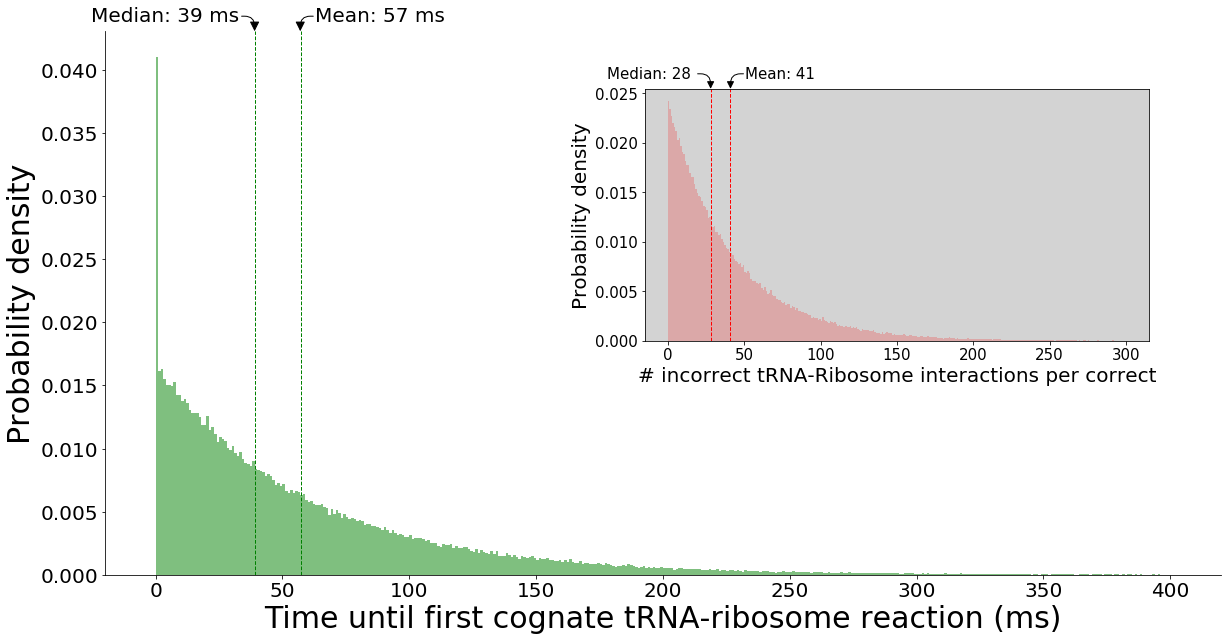

In [5]:
###300 bins
fig,ax=plt.subplots(figsize=(20,10))
ax.hist(time_taken_arr,range=[0,400],bins=400,color='green',alpha=0.5, density=True)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_ylabel('Probability density',fontsize=30)
ax.set_xlabel("Time until first cognate tRNA-ribosome reaction (ms)",fontsize=30)

ax.axvline(np.mean(time_taken_arr), color='green', linestyle='dashed', linewidth=1)
ax.axvline(np.median(time_taken_arr), color='green', linestyle='dashed', linewidth=1)

x0 = round(np.mean(time_taken_arr))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round(np.median(time_taken_arr))
xoff=-15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Median: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



##### Generate a plot of the incorrect "rolls" per correct "roll" distribution
ax = plt.axes([.5, .45, .35, .35], facecolor='lightgrey')
ax.hist(incorrectRolls_disting_arr,bins=300,range=(0,300),density=1,alpha=0.2,color='red');
ax.set_xlabel("# incorrect tRNA-Ribosome interactions per correct",fontsize=20)
ax.set_ylabel("Probability density",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)


ax.axvline(np.mean(incorrectRolls_disting_arr), color='red', linestyle='dashed', linewidth=1)
ax.axvline(np.median(incorrectRolls_disting_arr), color='red', linestyle='dashed', linewidth=1)

x0 = round(np.mean(incorrectRolls_disting_arr))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f} '.format(x0), xy=(x0, 1), xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=15,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round(np.median(incorrectRolls_disting_arr))
xoff=-15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Median: {:0.0f} '.format(x0), xy=(x0, 1), xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=15,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

plt.savefig("Fig1b.pdf")


# 1c. Realistic transport & Indistinguishable tRNA


## 1ci. Single-tRNA 

0.014583333333333334


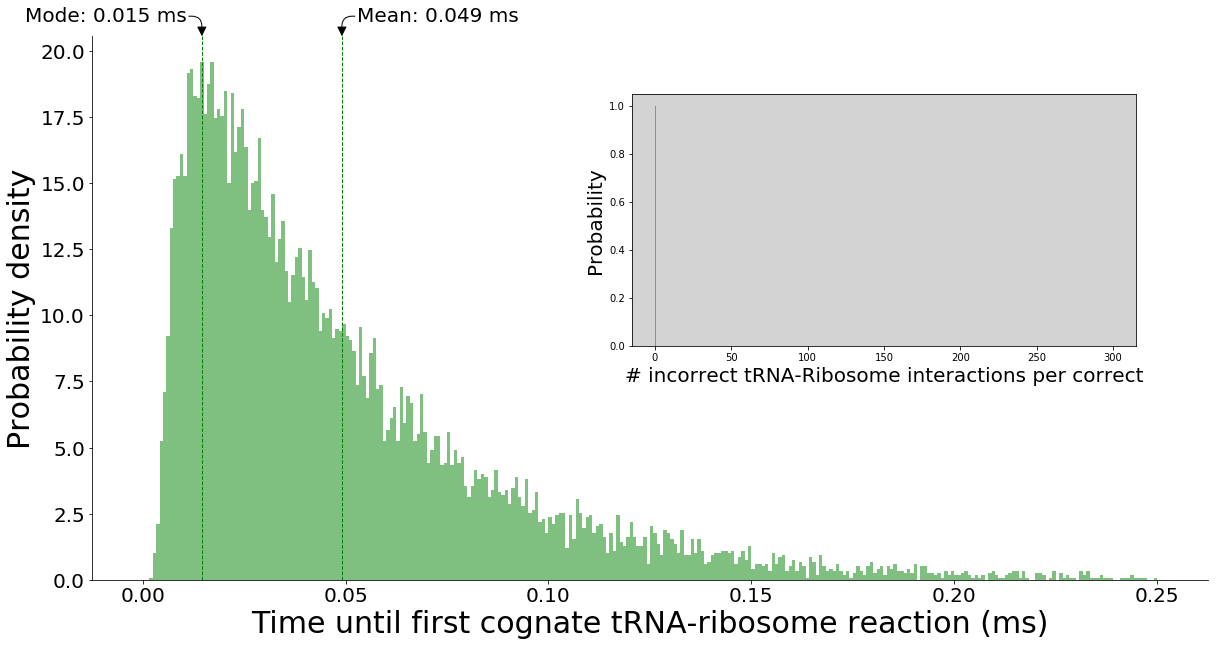

In [8]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlabel("Time until first cognate tRNA-ribosome reaction (ms)",fontsize=30)
ax.set_ylabel('Probability density',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

#######TIME 
import scipy.stats as sci
import matplotlib.ticker as ticker
path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "181005_1344"
df_outputs = pd.read_csv(path+data+"/outputReactionsList.txt",sep=" ",header=None)
transport_time = list()
expt_start = 6
expt_end= 290
for expt_num, row in df_outputs.iterrows():
    if(expt_num>=expt_start and expt_num<expt_end):
        df = pd.read_csv(path+data+"/"+row[0],delimiter=" ",header=None)
        df.columns=["time","rxn","x","y","z","reactantA","productA","productB"]
        df=df['time']
        transport_time.append(df.values)
transport_time = np.multiply([item for sublist in transport_time for item in sublist],1e3)
histTransport = ax.hist(transport_time,bins=300,range=(0,0.00025*1e3),density=1,color='green',alpha=0.5)

ax.axvline(np.mean(transport_time), color='green', linestyle='dashed', linewidth=1)
x0 = (np.mean(transport_time))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.3f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = ((histTransport[1][np.argmax(histTransport[0])]+histTransport[1][np.argmax(histTransport[0])+1])/2)
print(x0)

xoff=-15
align = 'left' if xoff > 0 else 'right'
ax.axvline(x0, color='green', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.3f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#####Incorrect
incorrectRolls_arr = [0]

ax = plt.axes([.5, .45, .35, .35], facecolor='lightgrey')
ax.hist(incorrectRolls_arr,bins=300,range=(0,300),density=1,color='red',alpha=0.5);

ax.set_xlabel("# incorrect tRNA-Ribosome interactions per correct",fontsize=20)
ax.set_ylabel("Probability",fontsize=20)

plt.savefig("Fig1ci.pdf")

## 1cii. Bulk-tRNA 


0.0003125


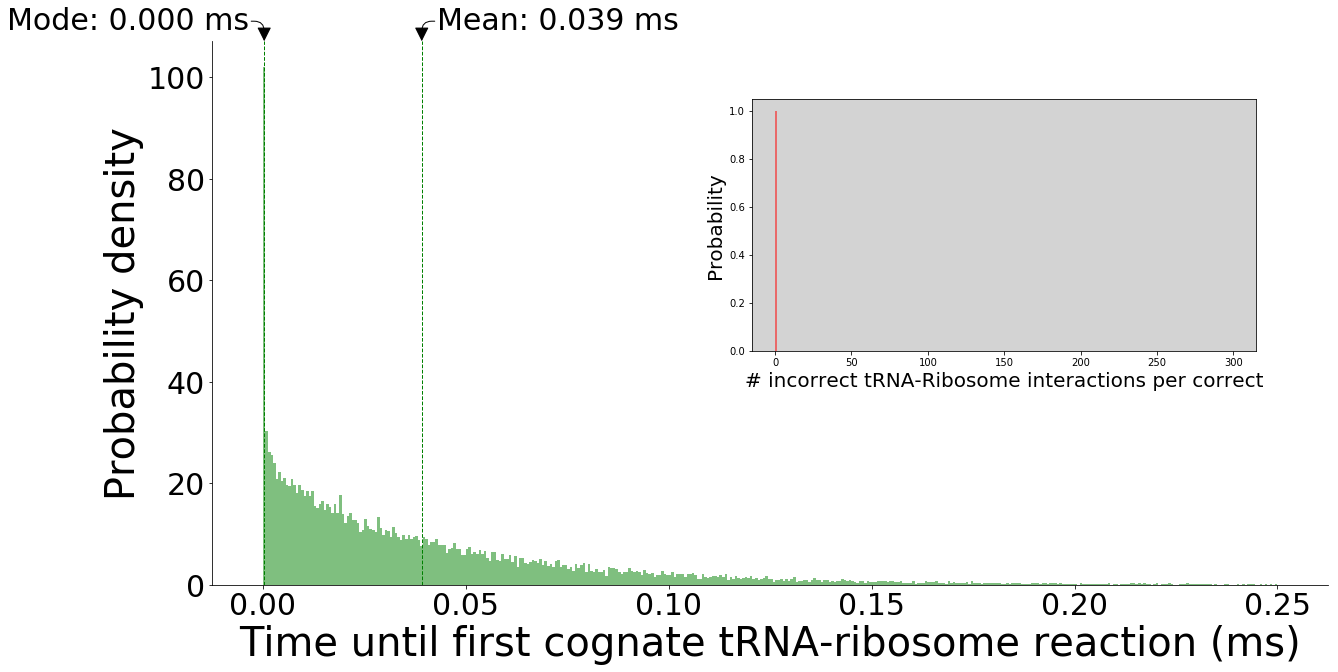

In [10]:
###Only tRNA that have sink of 1 middle ribosome. tRNA start uniform and ribosome uniform randomly distributed
##I predict in the previous section, was starting with ribosome/tRNA overlap, let's see how random ribosome distrib. looks
fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlabel("Time until first cognate tRNA-ribosome reaction (ms)",fontsize=40)
ax.set_ylabel('Probability density',fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)

#######TIME 

path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "181007_0059"
df_outputs = pd.read_csv(path+data+"/outputReactionsList.txt",sep=" ",header=None)
transport_time = list()
expt_start = 0
expt_end= 500
for expt_num, row in df_outputs.iterrows():
    if(expt_num>=expt_start and expt_num<expt_end):
        df = pd.read_csv(path+data+"/"+row[0],delimiter=" ",header=None)
        df.columns=["time","rxn","x","y","z","reactantA","productA","productB"]
        df=df['time']
        transport_time.append(df.values)
transport_time = np.multiply([item for sublist in transport_time for item in sublist],1e3)
histTransport = ax.hist(transport_time,bins=400,range=(0,0.00025*1e3),density=True,color='green',alpha=0.5)

ax.axvline(np.mean(transport_time), color='green', linestyle='dashed', linewidth=1)
x0 = (np.mean(transport_time))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.3f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=30,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = ((histTransport[1][np.argmax(histTransport[0])]+histTransport[1][np.argmax(histTransport[0])+1])/2)
print(x0)

xoff=-15
align = 'left' if xoff > 0 else 'right'
ax.axvline(x0, color='green', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.3f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=30,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#####Incorrect
incorrectRolls_arr = [0]

ax = plt.axes([.5, .45, .35, .35], facecolor='lightgrey')
ax.hist(incorrectRolls_arr,bins=300,range=(0,300),density=True,color='red',alpha=0.5);

ax.set_xlabel("# incorrect tRNA-Ribosome interactions per correct",fontsize=20)
ax.set_ylabel("Probability",fontsize=20)

plt.savefig("Fig1cii.pdf")

# 1d. Realistic transport & Distinguishable tRNA


## 1di. single-tRNA 


18.0
8.0


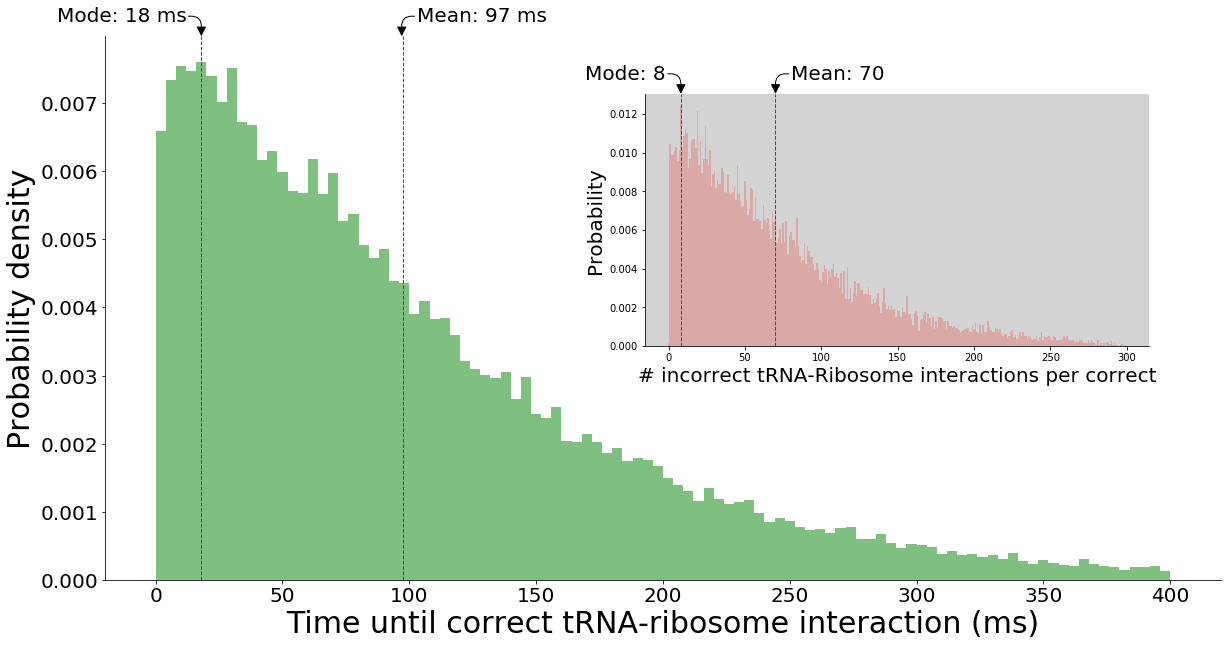

In [43]:
## Only tRNA that have sink of 1 middle ribosome. tRNA start at edge of voxel,
## while ribosome sits in middle. 100nm side voxel. With 41 non-cognates. 50 cognates non-interacting./
#here also recorded non-cognate reactions 
path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "181009_1311"
df_outputs = pd.read_csv(path+data+"/outputReactionsList.txt",sep=" ",header=None)
transport_time = list()
incorrect_count_arr=list()
expt_start = 0
expt_end= 500
for expt_num, row in df_outputs.iterrows():
    if(expt_num>=expt_start and expt_num<expt_end):
        df = pd.read_csv(path+data+"/"+row[0],delimiter=" ",header=None)
        df.columns=["time","rxn","x","y","z","reactantA","productA","productB"]
        df_corr=df.loc[df['rxn'].isin(["rxn6"])]
        transport_time.append(df_corr['time'].values)
        incorr_count_i =0
        for _,row in df.iterrows():
            if row['rxn']=='rxn6':
                incorrect_count_arr.append(incorr_count_i)
            if row['rxn']=='rxn7':
                incorr_count_i+=1
data = "181009_1130"
df_outputs = pd.read_csv(path+data+"/outputReactionsList.txt",sep=" ",header=None)
for expt_num, row in df_outputs.iterrows():
    if(expt_num>=expt_start and expt_num<expt_end):
        df = pd.read_csv(path+data+"/"+row[0],delimiter=" ",header=None)
        df.columns=["time","rxn","x","y","z","reactantA","productA","productB"]
        df_corr=df.loc[df['rxn'].isin(["rxn6"])]
        transport_time.append(df_corr['time'].values)
transport_time = np.multiply([item for sublist in transport_time for item in sublist],1e3)

#######TIME
fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlabel("Time until correct tRNA-ribosome interaction (ms)",fontsize=30)
ax.set_ylabel('Probability density',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

histTransport = ax.hist(transport_time,bins=100,range=(0,400),density=True,color='green',alpha=0.5);
ax.axvline(np.mean(transport_time), color='green', linestyle='dashed', linewidth=1)
x0 = round(np.mean(transport_time))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round((histTransport[1][np.argmax(histTransport[0])]+histTransport[1][np.argmax(histTransport[0])+1])/2)
print(x0)

xoff=-15
align = 'left' if xoff > 0 else 'right'
ax.axvline(x0, color='green', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  


#####Incorrect
ax = plt.axes([.5, .45, .35, .35], facecolor='lightgrey')

histIncorr, edges = np.histogram(incorrect_count_arr,bins=300,range=(0,300))
binWidth = edges[1] - edges[0]
ax.bar(edges[:-1], histIncorr/np.sum(histIncorr), binWidth,color='red',alpha=0.2)

#histIncorr = ax.hist(incorrect_count_arr,bins=100,range=(0,300),density=True,color='red',alpha=0.2);
ax.set_xlabel("# incorrect tRNA-Ribosome interactions per correct",fontsize=20)
ax.set_ylabel("Probability",fontsize=20)

ax.axvline(np.mean(incorrect_count_arr), color='red', linestyle='dashed', linewidth=1)
x0 = round(np.mean(incorrect_count_arr))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f}'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round((edges[(np.argmax(histIncorr))]+ edges[np.argmax(histIncorr)+1])/2)
print(x0)

xoff=-15
align = 'left' if xoff > 0 else 'right'
ax.axvline(x0, color='red', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.0f}'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

plt.savefig("Fig1di.pdf")

## 1dii. bulk-tRNA 




0.0


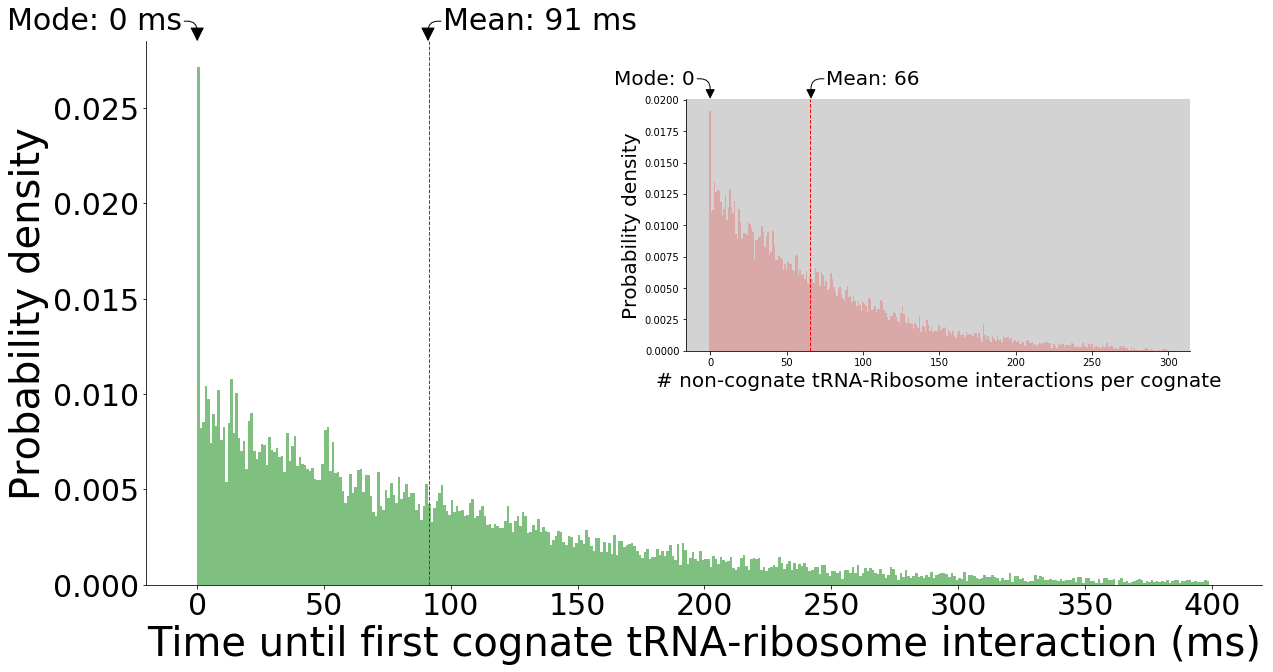

In [9]:

## Only tRNA that have sink of 1 middle ribosome. tRNA start at edge of voxel,
## while ribosome sits in middle. 100nm side voxel. With 41 non-cognates. 50 cognates non-interacting./
#here also recorded non-cognate reactions 
path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "181009_1446"
df_outputs = pd.read_csv(path+data+"/outputReactionsList.txt",sep=" ",header=None)
transport_time = list()
incorrect_count_arr=list()
expt_start = 0
expt_end= 500
for expt_num, row in df_outputs.iterrows():
    if(expt_num>=expt_start and expt_num<expt_end):
        df = pd.read_csv(path+data+"/"+row[0],delimiter=" ",header=None)
        df.columns=["time","rxn","x","y","z","reactantA","productA","productB"]
        df_corr=df.loc[df['rxn'].isin(["rxn6"])]
        transport_time.append(df_corr['time'].values)
        incorr_count_i =0
        for _,row in df.iterrows():
            if row['rxn']=='rxn6':
                incorrect_count_arr.append(incorr_count_i)
            if row['rxn']=='rxn7':
                incorr_count_i+=1
transport_time = np.multiply([item for sublist in transport_time for item in sublist],1e3)

#######TIME

fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlabel("Time until first cognate tRNA-ribosome interaction (ms)",fontsize=40)
ax.set_ylabel('Probability density',fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)

histTransport = ax.hist(transport_time,bins=400,range=(0,400),density=True,color='green',alpha=0.5);
ax.axvline(np.mean(transport_time), color='green', linestyle='dashed', linewidth=1)
x0 = round(np.mean(transport_time))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=30,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round((histTransport[1][np.argmax(histTransport[0])]+histTransport[1][np.argmax(histTransport[0])+1])/2)
print(x0)

xoff=-15
align = 'left' if xoff > 0 else 'right'
#ax.axvline(x0, color='green', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=30,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  



#####Incorrect
ax = plt.axes([.5, .45, .35, .35], facecolor='lightgrey')

histIncorr, edges = np.histogram(incorrect_count_arr,bins=300,range=(0,300))
binWidth = edges[1] - edges[0]
ax.bar(edges[:-1], histIncorr/np.sum(histIncorr), binWidth,color='red',alpha=0.2)

#histIncorr = ax.hist(incorrect_count_arr,bins=400,range=(0,400),density=True,color='red',alpha=0.2);
ax.set_xlabel("# non-cognate tRNA-Ribosome interactions per cognate",fontsize=20)
ax.set_ylabel("Probability density",fontsize=20)

ax.axvline(np.mean(incorrect_count_arr), color='red', linestyle='dashed', linewidth=1)
x0 = round(np.mean(incorrect_count_arr))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f}'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round((edges[(np.argmax(histIncorr))]+ edges[np.argmax(histIncorr)+1])/2)


xoff=-15
align = 'left' if xoff > 0 else 'right'
#ax.axvline(x0, color='red', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.0f}'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

plt.savefig("Fig1dii.pdf")

0.0


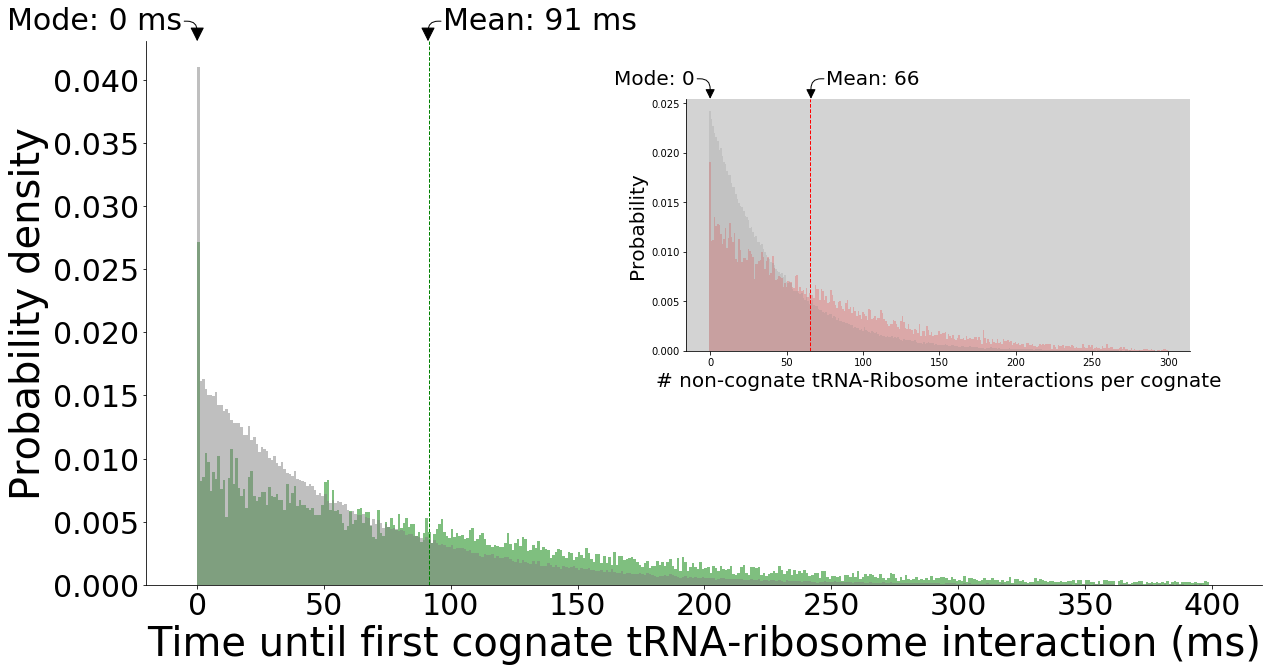

In [8]:

## Only tRNA that have sink of 1 middle ribosome. tRNA start at edge of voxel,
## while ribosome sits in middle. 100nm side voxel. With 41 non-cognates. 50 cognates non-interacting./
#here also recorded non-cognate reactions 
path = "/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/"
data = "181009_1446"
df_outputs = pd.read_csv(path+data+"/outputReactionsList.txt",sep=" ",header=None)
transport_time = list()
incorrect_count_arr=list()
expt_start = 0
expt_end= 500
for expt_num, row in df_outputs.iterrows():
    if(expt_num>=expt_start and expt_num<expt_end):
        df = pd.read_csv(path+data+"/"+row[0],delimiter=" ",header=None)
        df.columns=["time","rxn","x","y","z","reactantA","productA","productB"]
        df_corr=df.loc[df['rxn'].isin(["rxn6"])]
        transport_time.append(df_corr['time'].values)
        incorr_count_i =0
        for _,row in df.iterrows():
            if row['rxn']=='rxn6':
                incorrect_count_arr.append(incorr_count_i)
            if row['rxn']=='rxn7':
                incorr_count_i+=1
transport_time = np.multiply([item for sublist in transport_time for item in sublist],1e3)

#######TIME

fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlabel("Time until first cognate tRNA-ribosome interaction (ms)",fontsize=40)
ax.set_ylabel('Probability density',fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)

histTransport = ax.hist(transport_time,bins=400,range=(0,400),density=True,color='green',alpha=0.5);
ax.axvline(np.mean(transport_time), color='green', linestyle='dashed', linewidth=1)
x0 = round(np.mean(transport_time))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=30,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round((histTransport[1][np.argmax(histTransport[0])]+histTransport[1][np.argmax(histTransport[0])+1])/2)
print(x0)

xoff=-15
align = 'left' if xoff > 0 else 'right'
#ax.axvline(x0, color='green', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.0f} ms'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=30,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

###FIG 1b transport overlay###
ax.hist(time_taken_arr,range=[0,400],bins=400,color='grey',alpha=0.5, density=True)
################

#####Incorrect
ax = plt.axes([.5, .45, .35, .35], facecolor='lightgrey')

histIncorr, edges = np.histogram(incorrect_count_arr,bins=300,range=(0,300))
binWidth = edges[1] - edges[0]
ax.bar(edges[:-1], histIncorr/np.sum(histIncorr), binWidth,color='red',alpha=0.2)

#histIncorr = ax.hist(incorrect_count_arr,bins=400,range=(0,400),density=True,color='red',alpha=0.2);
ax.set_xlabel("# non-cognate tRNA-Ribosome interactions per cognate",fontsize=20)
ax.set_ylabel("Probability",fontsize=20)

ax.axvline(np.mean(incorrect_count_arr), color='red', linestyle='dashed', linewidth=1)
x0 = round(np.mean(incorrect_count_arr))
xoff=15
align = 'left' if xoff > 0 else 'right'
ax.annotate('Mean: {:0.0f}'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

x0 = round((edges[(np.argmax(histIncorr))]+ edges[np.argmax(histIncorr)+1])/2)

xoff=-15
align = 'left' if xoff > 0 else 'right'
#ax.axvline(x0, color='red', linestyle='dashed', linewidth=1)
ax.annotate('Mode: {:0.0f}'.format(x0), xy=(x0, 1), xytext=(xoff, 20),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',fontsize=20,
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  


####fig 1b incorrect hist overlay######
histIncorr, edges = np.histogram(incorrectRolls_disting_arr,bins=300,range=(0,300))
binWidth = edges[1] - edges[0]
ax.bar(edges[:-1], histIncorr/np.sum(histIncorr), binWidth,color='grey',alpha=0.2)

#ax.hist(incorrectRolls_disting_arr,bins=300,range=(0,300),density=1,alpha=0.2,color='grey');
##############

plt.savefig("Fig1dii_overlay.pdf")